In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the different data sets (1000 samples)
data_benign = pd.read_csv('data/benign_def_before.dat',
            header=None, sep=',')
print("First data set loaded")
data_mal = pd.read_csv('data/benign_def_Mal_before.dat',
            header=None, sep=',')
print("Second data set loaded")
data_mal_modified = pd.read_csv('data/benign_def_mal_after.dat',
            header=None, sep=',')
print("Third data set loaded")

data_mal_trained = pd.read_csv('data/benign_trained_mal_before.dat',
            header=None, sep=',')
print("Fourth data set loaded")

data_mal_modified_trained = pd.read_csv('data/benign_trained_mal_after.dat',
            header=None, sep=',')
print("Fifth data set loaded")


First data set loaded
Second data set loaded
Third data set loaded
Fourth data set loaded
Fifth data set loaded


In [2]:
from scipy import spatial
import math
from sklearn.metrics import jaccard_score

cosine_similarities = []
jacard_similarities = []
for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_modified[i], data_mal[i])
    jac_score = jaccard_score(data_mal_modified[i], data_mal[i])
    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
        
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between malicious and modififed malicious " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between malicious and modififed malicious " + str(np.mean(jacard_similarities)))


cosine_similarities = []
jacard_similarities = []

for i in range(0, len(data_mal)):
    cos_sim = 1 - spatial.distance.cosine(data_mal_trained[i], data_mal_modified_trained[i])
    jac_score = jaccard_score(data_mal_trained[i], data_mal_modified_trained[i])

    if math.isnan(cos_sim):
        cosine_similarities.append(0)
    else:
        cosine_similarities.append(cos_sim)
    if math.isnan(jac_score):
        jacard_similarities.append(0)
    else:
        jacard_similarities.append(jac_score)
print("Cosine similarity between malicious and modififed malicious (trained) " + str(np.mean(cosine_similarities)))
print("Jaccard similarity between malicious and modififed malicious (trained) " + str(np.mean(jacard_similarities)))


/Users/lennartoverdevest/miniconda3/lib/python3.7/site-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
/Users/lennartoverdevest/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 due to no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cosine similarity between malicious and modififed malicious 0.7495427955126407
Jaccard similarity between malicious and modififed malicious 0.6117414799846292
Cosine similarity between malicious and modififed malicious (trained) 0.7225115740639904
Jaccard similarity between malicious and modififed malicious (trained) 0.5787709806573053


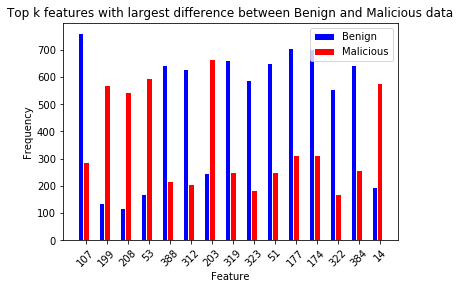

In [3]:
import familiarization as fm
# Compute the summation of each column/feature
sum_column_benign = data_benign.sum(axis = 0, skipna = True)
sum_column_mal = data_mal.sum(axis = 0, skipna = True)

# Difference between benign and malicious
diff_benign_mal = abs(sum_column_benign - sum_column_mal)
diff_benign_mal = diff_benign_mal.sort_values(ascending=False)

# Define limit for plot
limit_top_x = 15

# Create dataframe for plotting
plot_df = pd.DataFrame()
plot_df_mal = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_benign_mal.index[i]
    columns.append(cur_feature_name)
    plot_df[cur_feature_name] = data_benign[cur_feature_name] 
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df, plot_df_mal, columns, "Benign", "Malicious")

In [4]:
# Difference between benign and malicious
total = diff_benign_mal.shape[0]
df = pd.DataFrame()
df['difference'] = diff_benign_mal.value_counts().index
df['percentage'] = diff_benign_mal.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)

df

,difference,percentage
0,0.0,0.765125
1,1.0,0.139888
2,2.0,0.025043
3,3.0,0.013312
4,4.0,0.007513
5,5.0,0.004789
8,6.0,0.002768
6,7.0,0.002372
7,8.0,0.002812
9,9.0,0.002329


In [5]:
print("Comparing the k most features with less than k changes for the benign and malicious data set, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

Comparing the k most features with less than k changes for the benign and malicious data set, shows us that 96.595% of data only differ at most 10 values


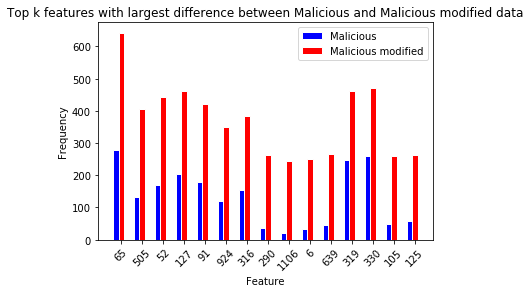

In [6]:
# Sum values of each column
sum_column_mal = data_mal.sum(axis = 0, skipna = True)
sum_column_mod = data_mal_modified.sum(axis = 0, skipna = True)

# Difference between  malicious and modified malicious
diff_mod_mal = abs(sum_column_mod - sum_column_mal)
diff_mod_mal = diff_mod_mal.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal = pd.DataFrame()
plot_df_mod = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal.index[i]
    columns.append(cur_feature_name)
    plot_df_mal[cur_feature_name] = data_mal[cur_feature_name] 
    plot_df_mod[cur_feature_name] = data_mal_modified[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious modified")

In [7]:
total = diff_benign_mal.shape[0]
df = pd.DataFrame()
df['difference'] = diff_mod_mal.value_counts().index
df['percentage'] = diff_mod_mal.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)
df

,difference,percentage
1,0.0,0.118932
3,1.0,0.120733
0,2.0,0.180221
2,3.0,0.324195
4,4.0,0.063003
5,5.0,0.028602
7,6.0,0.007293
9,7.0,0.004745
13,8.0,0.007030
18,9.0,0.005843


In [8]:
print("Comparing the k most features with less than k changes for the malicious and modified malicious data set, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

Comparing the k most features with less than k changes for the malicious and modified malicious data set, shows us that 86.059% of data only differ at most 10 values


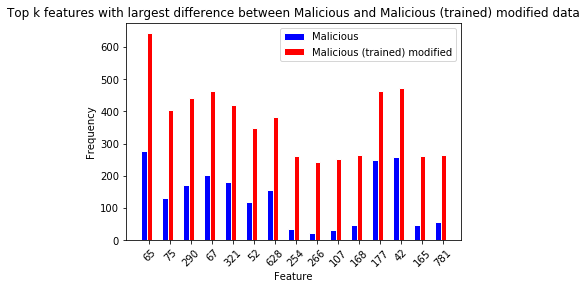

In [9]:
# Sum values of each column
sum_column_mal_trained = data_mal_trained.sum(axis = 0, skipna = True)
sum_column_mod_trained = data_mal_modified_trained.sum(axis = 0, skipna = True)

# Difference between malicious and modified malicious with trained network
diff_mod_mal_trained = abs(sum_column_mal_trained - sum_column_mod_trained)
diff_mod_mal_trained = diff_mod_mal_trained.sort_values(ascending=False)

# Create dataframe for plotting
plot_df_mal_trained = pd.DataFrame()
plot_df_mod_trained = pd.DataFrame()
columns = []
for i in range(0, limit_top_x):
    cur_feature_name = diff_mod_mal_trained.index[i]
    columns.append(cur_feature_name)
    plot_df_mal_trained[cur_feature_name] = data_mal_trained[cur_feature_name] 
    plot_df_mod_trained[cur_feature_name] = data_mal_modified_trained[cur_feature_name] 

# Plot the data
fm.bar_plot(plot_df_mal, plot_df_mod, columns, "Malicious", "Malicious (trained) modified")

In [10]:
total = diff_mod_mal_trained.shape[0]
df = pd.DataFrame()
df['difference'] = diff_mod_mal_trained.value_counts().index
df['percentage'] = diff_mod_mal_trained.value_counts() / total
df = df.sort_values('difference')
df = df.head(10)
df

,difference,percentage
1,0.0,0.106322
3,1.0,0.152981
0,2.0,0.197619
2,3.0,0.327929
4,4.0,0.043364
6,5.0,0.006722
9,6.0,0.005580
13,7.0,0.004350
10,8.0,0.003998
12,9.0,0.003822


In [11]:
print("Comparing the k most features with less than k changes for the malicious and modified malicious after 10 epoches of training, shows us that " +  str(round(df['percentage'].sum() * 100, 3)) + "% of data only differ at most 10 values")

Comparing the k most features with less than k changes for the malicious and modified malicious after 10 epoches of training, shows us that 85.269% of data only differ at most 10 values
